# Visual Area Segmentation

In [1]:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
from PIL import Image

## Load data

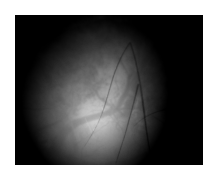

In [9]:
# retinotopic mapping data
maps = np.load('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/raw-maps.npy', allow_pickle=True).item()
# vasculature picture
imVasc = np.array(Image.open('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/vasculature-PVNR1_M3-HQ.tif'))
plt.imshow(imVasc, cmap=plt.cm.grey); plt.axis('off');

# Retinotopic Maps

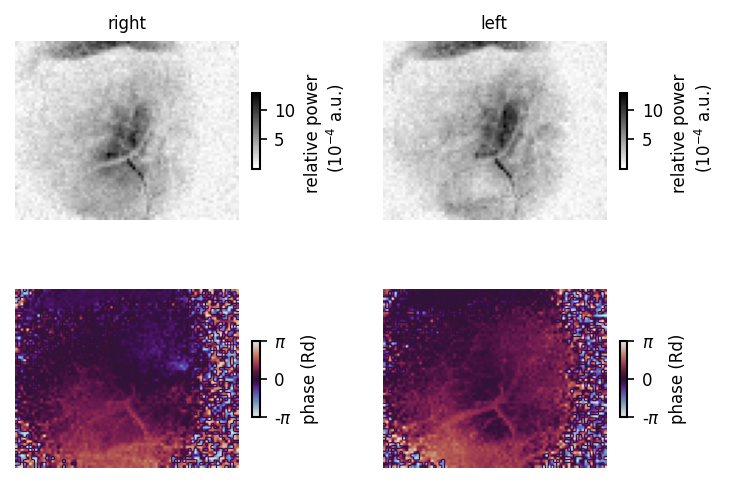

In [3]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['right', 'left']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

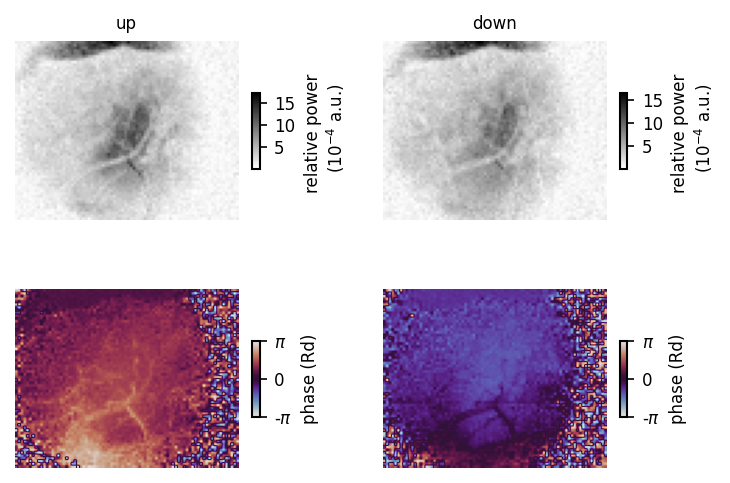

In [4]:
fig, AX = pt.figure(axes=(2,2), figsize=(1.5,2), hspace=0.5, wspace=0.5)

for p, direction in enumerate(['up', 'down']):
    plot_power_map(AX[0][p], fig, maps['%s-power' % direction])
    plot_phase_map(AX[1][p], fig, maps['%s-phase' % direction])
    AX[0][p].set_title(direction)
for ax in pt.flatten(AX):
    ax.axis('off')

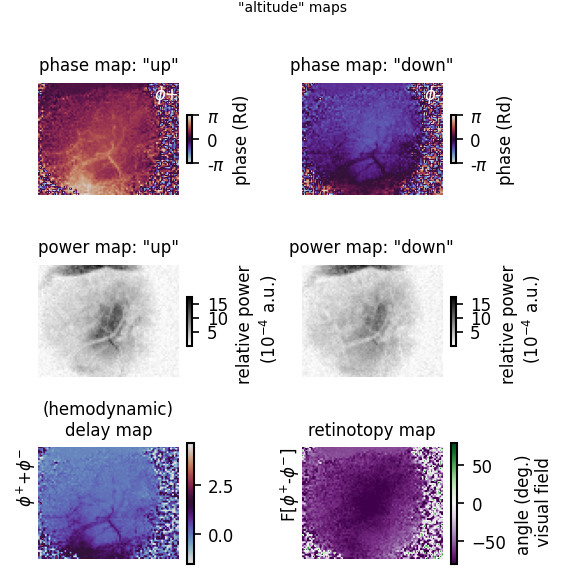

In [5]:
plot_retinotopic_maps(maps, map_type='altitude');

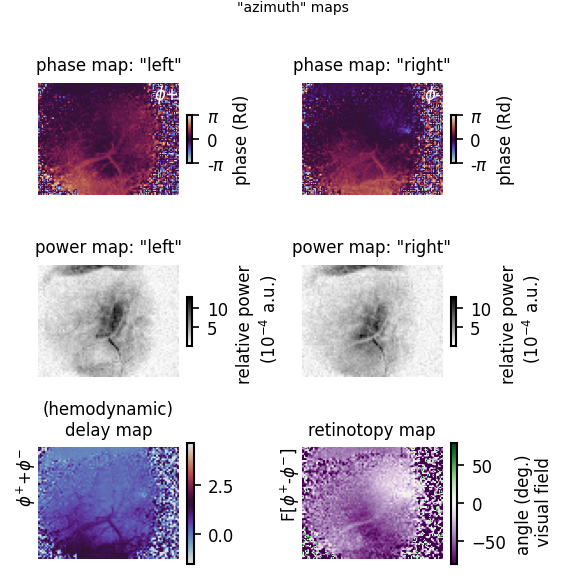

In [6]:
plot_retinotopic_maps(maps, map_type='azimuth');

# Area Segmentation

In [7]:
params = build_trial_data(maps)
default_segmentation_params={'phaseMapFilterSigma': 1.,
                             'signMapFilterSigma': 1.,
                             'signMapThr': 0.5,
                             'eccMapFilterSigma': 10.,
                             'splitLocalMinCutStep': 5.,
                             'mergeOverlapThr': 0.1,
                             'closeIter': 3,
                             'openIter': 3,
                             'dilationIter': 15,
                             'borderWidth': 1,
                             'smallPatchThr': 100,
                             'visualSpacePixelSize': 0.5,
                             'visualSpaceCloseIter': 15,
                             'splitOverlapThr': 1.1}
trial = RetinotopicMapping.RetinotopicMappingTrial(**params)

In [ ]:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt

maps = np.load('/Users/yann/UNPROCESSED/CIBELE/2024_06_28/12-36-46/raw-maps.npy', allow_pickle=True).item()

data = build_trial_data(maps)
segmentation_params={'phaseMapFilterSigma': 2.,
                     'signMapFilterSigma': 2.,
                     'signMapThr': 0.6,
                     'eccMapFilterSigma': 10.,
                     'splitLocalMinCutStep': 5.,
                     'mergeOverlapThr': 0.1,
                     'closeIter': 3,
                     'openIter': 3,
                     'dilationIter': 15,
                     'borderWidth': 1,
                     'smallPatchThr': 100,
                     'visualSpacePixelSize': 0.5,
                     'visualSpaceCloseIter': 15,
                     'splitOverlapThr': 1.1}
data['params'] = segmentation_params
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=True)

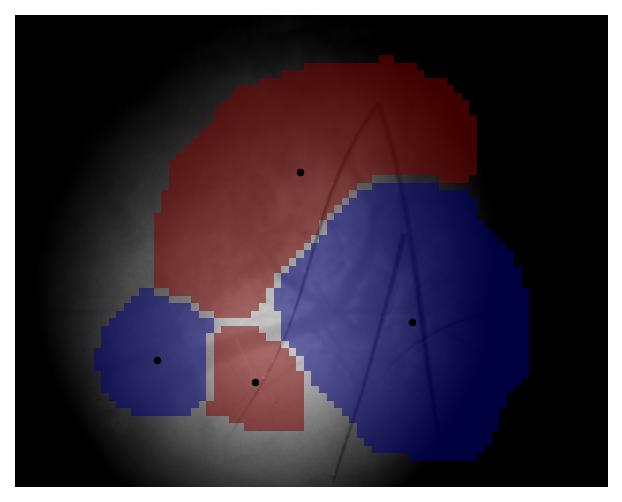

In [47]:
fig, ax = pt.figure(figsize=(5,5))
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=im.min(), vmax=im.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.axis('off')
fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))